<style>
div.cell, div.text_cell_render{
  max-width:750px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 140%;
  }

.rendered_html li
{
  line-height: 1.8;
  }

.rendered_html h1, h2 {
  text-align:center;
  font-familly:"Charis SIL", serif;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas;
  font-size: 110%;
  }
</style>

# An Introduction to Numerical Computing with Python
While the Python language is an excellent tool for general-purpose programming, with a highly readable syntax, rich and powerful data types (strings, lists, sets, dictionaries, arbitrary length integers, etc) and a very comprehensive standard library, it was not designed specifically for mathematical and scientific computing.  Neither the language nor its standard library have facilities for the efficient representation of multidimensional datasets, tools for linear algebra and general matrix manipulations (an essential building block of virtually all technical computing), nor any data visualization facilities.

In particular, Python lists are very flexible containers that can be nested arbitrarily deep and which can hold any Python object in them, but they are poorly suited to represent efficiently common mathematical constructs like vectors and matrices.  In contrast, much of our modern heritage of scientific computing has been built on top of libraries written in the Fortran language, which has native support for vectors and matrices as well as a library of mathematical functions that can efficiently operate on entire arrays at once.

## Basics of Numpy arrays

We now turn our attention to the Numpy library, which forms the base layer for the entire 'scipy ecosystem'.  Once you have installed numpy, you can import it as:

In [1]:
import numpy as np

### The Numpy array structure

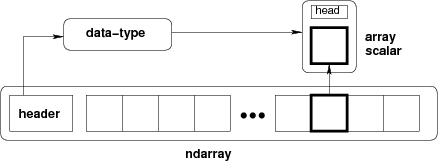

In [2]:
from IPython.display import Image
Image("images/dtype.png")

As mentioned above, the main object provided by numpy is a powerful array.  We'll start by exploring how the numpy array differs from Python lists.  We start by creating a simple list and an array with the same contents of the list:

In [7]:
lst = [10, 20, 30, 40]
arr = np.array(lst)

### Element indexing

Elements of a one-dimensional array are accessed with the same syntax as a list:

In [8]:
lst[0]

10

In [9]:
arr[0]

10

In [10]:
arr[-1]

40

In [11]:
arr[2:]

array([30, 40])

### Differences between arrays and lists

The first difference to note between lists and arrays is that arrays are *homogeneous*; i.e. all elements of an array must be of the same type.  In contrast, lists can contain elements of arbitrary type. For example, we can change the last element in our list above to be a string:

In [12]:
lst[-1] = 'a string inside a list'
lst

[10, 20, 30, 'a string inside a list']

but the same can not be done with an array, as we get an error message:

In [13]:
arr[-1] = 'a string inside an array'

ValueError: invalid literal for int() with base 10: 'a string inside an array'

### Array Attributes

The information about the type of an array is contained in its *dtype* attribute:

In [14]:
arr.dtype

dtype('int64')

Once an array has been created, its dtype is fixed and it can only store elements of the same type.  For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [15]:
arr[-1] = 1.234
arr

array([10, 20, 30,  1])

### Creating Arrays

Above we created an array from an existing list; now let us now see other ways in which we can create arrays, which we'll illustrate next.  A common need is to have an array initialized with a constant value, and very often this value is 0 or 1 (suitable as starting value for additive and multiplicative loops respectively); `zeros` creates arrays of all zeros, with any desired dtype:

In [21]:
np.zeros(5, dtype=np.float64)

array([ 0.,  0.,  0.,  0.,  0.])

In [19]:
np.zeros(3, dtype=np.int32)

array([0, 0, 0], dtype=int32)

In [25]:
np.zeros(3, dtype=np.complex64)

array([ 0.+0.j,  0.+0.j,  0.+0.j], dtype=complex64)

and similarly for `ones`:

In [26]:
print('5 ones:', np.ones(5))

5 ones: [ 1.  1.  1.  1.  1.]


If we want an array initialized with an arbitrary value, we can create an empty array and then use the fill method to put the value we want into the array:

In [17]:
a = np.empty(4)
a.fill(5.5)
a

array([ 5.5,  5.5,  5.5,  5.5])

### Filling arrays with sequences

Numpy also offers the `arange` function, which works like the builtin `range` but returns an array instead of a list:

In [27]:
np.arange(5)

array([0, 1, 2, 3, 4])

and the `linspace` and `logspace` functions to create linearly and logarithmically-spaced grids respectively, with a fixed number of points and including both ends of the specified interval:

In [28]:
print("A linear grid between 0 and 1:")
print(np.linspace(0, 1, 4))

A linear grid between 0 and 1:
[ 0.          0.33333333  0.66666667  1.        ]


In [29]:
print("A logarithmic grid between 10**1 and 10**3:")
print(np.logspace(1, 3, 4))

A logarithmic grid between 10**1 and 10**3:
[   10.            46.41588834   215.443469    1000.        ]


### Creating random arrays

Finally, it is often useful to create arrays with random numbers that follow a specific distribution.  The `np.random` module contains a number of functions that can be used to this effect, for example this will produce an array of 5 random samples taken from a standard normal distribution (0 mean and variance 1):

In [36]:
np.random.randn(5)

array([ 0.46540117, -1.59592626, -0.68776279,  0.05618769, -0.03661469])

whereas this will also give 5 samples, but from a normal distribution with a mean of 10 and a variance of 3:

In [37]:
norm10 = np.random.normal(10, 3, 5)
norm10

array([  7.28033206,  11.99795768,   5.57454933,   8.27313691,  11.71155105])

## Exercise

Create a list with 1 million of consecutive integers (use `range()`) and sum them all (via `sum()`).  Convert that list into a numpy array and do the same aggregation.  Which one is faster?

** Hint:** Use the `%time` and `%timeit` magic functions for doing the timings.  Ex:

In [31]:
l = list(range(1000*1000))
%time s = sum(l)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.2 ms


### Solution

## Indexing with other arrays
Above we saw how to index arrays with single numbers and slices, just like Python lists.  But arrays allow for a more sophisticated kind of indexing which is very powerful: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to extract information from an array that matches a certain condition.

Consider for example that in the array `norm10` we want to replace all values above 9 with the value 0.  We can do so by first finding the *mask* that indicates where this condition is true or false:

In [41]:
norm10

array([  7.28033206,  11.99795768,   5.57454933,   8.27313691,  11.71155105])

In [42]:
mask = norm10 > 9
mask

array([False,  True, False, False,  True], dtype=bool)

Now that we have this mask, we can use it to either read those values or to reset them to 0:

In [43]:
print('Values above 9:', norm10[mask])

Values above 9: [ 11.99795768  11.71155105]


In [44]:
print('Resetting all values above 9 to 0...')
norm10[mask] = 0
print(norm10)

Resetting all values above 9 to 0...
[ 7.28033206  0.          5.57454933  8.27313691  0.        ]


## Exercise

Get all the values of norm10 that are between 5 and 10.

**Hint:** Use logical operations with conditions.

## Arrays with more than one dimension
Up until now all our examples have used one-dimensional arrays.  But Numpy can create arrays of aribtrary dimensions, and all the methods illustrated in the previous section work with more than one dimension.  For example, a list of lists can be used to initialize a two dimensional array:

In [45]:
lst2 = [[1, 2], [3, 4]]
arr2 = np.array(lst2)
arr2

array([[1, 2],
       [3, 4]])

With two-dimensional arrays we start seeing the power of numpy: while a nested list can be indexed using repeatedly the `[ ]` operator, multidimensional arrays support a much more natural indexing syntax with a single `[ ]` and a set of indices separated by commas:

In [46]:
print(lst2[0][1])
print(arr2[0,1])

2
2


Most of the array creation functions listed above can be used with more than one dimension, for example:

In [47]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [48]:
np.random.normal(10, 3, (2, 4))

array([[ 10.15248944,  12.08028065,   6.49964197,  14.22759984],
       [  8.53152879,  11.74326336,   4.53913441,   9.79785339]])

In fact, the shape of an array can be changed at any time, as long as the total number of elements is unchanged.  For example, if we want a 2x4 array with numbers increasing from 0, the easiest way to create it is:

In [49]:
arr = np.arange(8).reshape(2, 4)
print(arr)

[[0 1 2 3]
 [4 5 6 7]]


### Views, not Copies

Note that reshaping (like most numpy operations) provides a **view** of *the same memory*:

In [50]:
arr = np.arange(8)
arr2 = arr.reshape(2, 4)

arr[0] = 1000
print(arr)
print(arr2)

[1000    1    2    3    4    5    6    7]
[[1000    1    2    3]
 [   4    5    6    7]]


Avoiding the copies is important because 1) saves memory and 2) makes operations more efficient.

### Slices

With multidimensional arrays, you can also use slices, and you can mix and match slices and single indices in the different dimensions (using the same array as above):

In [51]:
print('Slicing in the second row:', arr2[1, 2:4])
print('All rows, third column   :', arr2[:, 2])

Slicing in the second row: [6 7]
All rows, third column   : [2 6]


If you only provide one index, then you will get an array with one less dimension containing that row:

In [52]:
print('First row:  ', arr2[0])
print('Second row: ', arr2[1])

First row:   [1000    1    2    3]
Second row:  [4 5 6 7]


## Exercise

Prove that a slice is actually a view (i.e. not a copy) of the underlying array.

### Solution

### Structured arrays

These are regular arrays but whose data type comes with different fields.  For example:

In [56]:
sarr = np.array([(1, 2, "a string"), (3, 2.1, "")], dtype="int32,float64,S10")
sarr

array([(1, 2.0, b'a string'), (3, 2.1, b'')], 
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', 'S10')])

There are different ways to index them.  By row:

In [57]:
sarr[1]

(3, 2.1, b'')

Or by column:

In [58]:
sarr['f2']  # the fields are labeled by default 'f0', 'f1', 'f2'

array([b'a string', b''], 
      dtype='|S10')

You can also do simple queries with structured arrays:

In [59]:
sarr[sarr['f1'] > 2]

array([(3, 2.1, b'')], 
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', 'S10')])

The structured arrays are very convenient in situations where you have to deal with heterogenous datasets, aka tables.  More on this in the PyTables lecture.

### Masked arrays

Masked arrays are regular NumPy arrays but with a complementary mask (a boolean array) that tells the data elements that are **invalid**.  Example:

In [60]:
x = np.array([1, 2, 3, -1, 5])
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data = [1 2 3 -- 5],
             mask = [False False False  True False],
       fill_value = 999999)

In [61]:
# Most methods works with masked arrays
mx.mean()

2.75

In [62]:
# Another way to construct a masked array
mx2 = np.ma.masked_where(x>1, x)
mx2

masked_array(data = [1 -- -- -1 --],
             mask = [False  True  True False  True],
       fill_value = 999999)

Masked arrays are very useful in real life (e.g. the sensor has not valid data in some points).

## Array Properties and Methods

Now that we have seen how to create arrays with more than one dimension, it's a good idea to look at some of the most useful properties and methods that arrays have.  The following provide basic information about the size, shape and data in the array:

In [63]:
arr = np.arange(8)
print('Data type                :', arr.dtype)
print('Total number of elements :', arr.size)
print('Number of dimensions     :', arr.ndim)
print('Shape (dimensionality)   :', arr.shape)
print('Memory used (in bytes)   :', arr.nbytes)

Data type                : int64
Total number of elements : 8
Number of dimensions     : 1
Shape (dimensionality)   : (8,)
Memory used (in bytes)   : 64


Arrays also have many useful methods, some especially useful ones are:

In [64]:
print('Minimum and maximum             :', arr.min(), arr.max())
print('Sum and product of all elements :', arr.sum(), arr.prod())
print('Mean and standard deviation     :', arr.mean(), arr.std())

Minimum and maximum             : 0 7
Sum and product of all elements : 28 0
Mean and standard deviation     : 3.5 2.29128784748


For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [65]:
print('For the following array:\n', arr2)
print('The sum of elements along the rows is    :', arr2.sum(axis=1))
print('The sum of elements along the columns is :', arr2.sum(axis=0))

For the following array:
 [[1000    1    2    3]
 [   4    5    3    7]]
The sum of elements along the rows is    : [1006   19]
The sum of elements along the columns is : [1004    6    5   10]


As you can see in this example, the value of the `axis` parameter is the dimension which will be *consumed* once the operation has been carried out.  This is why to sum along the rows we use `axis=0`.  

This can be easily illustrated with an example that has more dimensions; we create an array with 4 dimensions and shape `(3,4,5,6)` and sum along the axis number 2 (i.e. the *third* axis, since in Python all counts are 0-based).  That consumes the dimension whose length was 5, leaving us with a new array that has shape `(3,4,6)`:

## Exercise

Create an array with 4 dimensions and sum along the axis number 2.  Which would be the shape of the result?

### Solution

## Transposed arrays

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [54]:
print('Array:\n', arr)
print('Transpose:\n', arr.T)

Array:
 [0 1 2 3 4 5 6 7]
Transpose:
 [0 1 2 3 4 5 6 7]


## Exercise

Transposed arrays are views or copies?

### Solution

## More array properties

We don't have time here to look at all the methods and properties of arrays, here's a complete list.  Simply try exploring some of these IPython to learn more, or read their description in the full Numpy documentation:

    arr.T             arr.copy          arr.getfield      arr.put           arr.squeeze
    arr.all           arr.ctypes        arr.imag          arr.ravel         arr.std
    arr.any           arr.cumprod       arr.item          arr.real          arr.strides
    arr.argmax        arr.cumsum        arr.itemset       arr.repeat        arr.sum
    arr.argmin        arr.data          arr.itemsize      arr.reshape       arr.swapaxes
    arr.argsort       arr.diagonal      arr.max           arr.resize        arr.take
    arr.astype        arr.dot           arr.mean          arr.round         arr.tofile
    arr.base          arr.dtype         arr.min           arr.searchsorted  arr.tolist
    arr.byteswap      arr.dump          arr.nbytes        arr.setasflat     arr.tostring
    arr.choose        arr.dumps         arr.ndim          arr.setfield      arr.trace
    arr.clip          arr.fill          arr.newbyteorder  arr.setflags      arr.transpose
    arr.compress      arr.flags         arr.nonzero       arr.shape         arr.var
    arr.conj          arr.flat          arr.prod          arr.size          arr.view
    arr.conjugate     arr.flatten       arr.ptp           arr.sort          

## Operating with arrays
Arrays support all regular arithmetic operators, and the numpy library also contains a complete collection of basic mathematical functions that operate on arrays.  It is important to remember that in general, all operations with arrays are applied *element-wise*, i.e., are applied to all the elements of the array at the same time.  Consider for example:

In [76]:
arr1 = np.arange(4)
arr2 = np.arange(10, 14)
print(arr1, '+', arr2, '=', arr1 + arr2)

[0 1 2 3] + [10 11 12 13] = [10 12 14 16]


Importantly, you must remember that even the multiplication operator is by default applied element-wise, it is *not* the matrix multiplication from linear algebra (as is the case in Matlab, for example):

In [77]:
print(arr1, '*', arr2, '=', arr1 * arr2)

[0 1 2 3] * [10 11 12 13] = [ 0 11 24 39]


We may also multiply an array by a scalar:

In [78]:
1.5 * arr1

array([ 0. ,  1.5,  3. ,  4.5])

This is a first example of **broadcasting**.

### Broadcasting

While this means that in principle arrays must always match in their dimensionality in order for an operation to be valid, numpy will *broadcast* dimensions when possible.  Here is an example of broadcasting a scalar to a 1D array:

In [75]:
print(np.arange(3))
print(np.arange(3) + 5)

[0 1 2]
[5 6 7]


We can also broadcast a 1D array to a 2D array, in this case adding a vector to all rows of a matrix:

In [79]:
np.ones((3, 3)) + np.arange(3)

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Rules of Broadcasting

Broadcasting rules can do the following:

1. If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is *padded* with ones on its leading (left) side.

2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is *stretched* to match the other shape.

3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

Note that all of this happens without ever actually creating the stretched arrays in memory! This broadcasting behavior is in practice enormously powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't actually replicate the data.  In the example above the operation is carried *as if* the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created.  This can save lots of memory in cases when the arrays in question are large and can have significant performance implications.

## Exercise

Could you explain how broadcasting works for explaining the next results?

In [81]:
np.arange(3) + 5

array([5, 6, 7])

In [82]:
np.ones((3, 3)) + np.arange(3)

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [80]:
np.arange(3).reshape(3, 1) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Solution

### More fun with broadcasting

Will the following broadcasting operation work?

In [85]:
arr1 = np.ones((2, 3))
arr2 = np.ones(2)

arr1 + arr2

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

No because the rules of broadcasting cannot be applied in this case.  So, we need to be explicit in the shape of operands here:

In [62]:
arr1 = np.ones((2, 3))
arr2 = np.ones((2, 1))

arr1 + arr2

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.]])

## Exercise

Use ``np.arange`` and ``reshape`` to create the array:

    A = [[1 2 3 4]
         [5 6 7 8]]

Use ``np.arange`` to create the array:

    B = [1 2]
    
Use broadcasting to add ``B`` to each **column** of ``A`` to create the final array:

    A + B = [[2  3  4  5]
             [7  8  9 10]

Hint: what shape does ``B`` have to be changed to?

### Solution

### Element-wise Functions (ufuncs)

As we mentioned before, Numpy ships with a full complement of mathematical functions that work on entire arrays, including logarithms, exponentials, trigonometric and hyperbolic trigonometric functions, etc.  For example, sampling the sine function at 100 points between $0$ and $2\pi$ is as simple as:

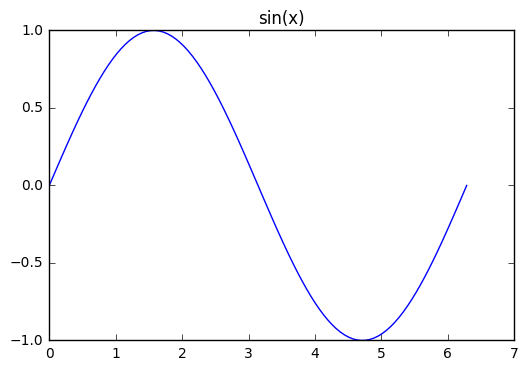

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x,y)
plt.title('sin(x)')

For exaluating such mathematical functions, it is worth knowing that it exists a package called `numexpr` that can accelerate these operations by a great deal, most specially when working with large arrays:

In [90]:
import numexpr as ne
x = np.linspace(0, 2*np.pi, 100)
%timeit np.sin(x)
%timeit ne.evaluate('sin(x)')

The slowest run took 10.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.77 µs per loop
The slowest run took 6.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.6 µs per loop


Numexpr is slower for 'small' arrays (due to JIT overhead).   Let's try with larger ones:

In [91]:
x = np.linspace(0, 2*np.pi, 1e6)
%timeit np.sin(x)
%timeit ne.evaluate('sin(x)')

10 loops, best of 3: 24.7 ms per loop
100 loops, best of 3: 1.99 ms per loop


This 10x speedup is pretty impressive.  The secret?  numexpr uses several techniques, but in this case the key is that it can leverage all the cores in parallel, and also use Intel MKL for optimizing the computations.

  Furthermore, scipy ships a rich special function library in the `scipy.special` module that includes Bessel, Airy, Fresnel, Laguerre and other classical special functions.  Look at http://docs.scipy.org/doc/scipy/reference/special.html.

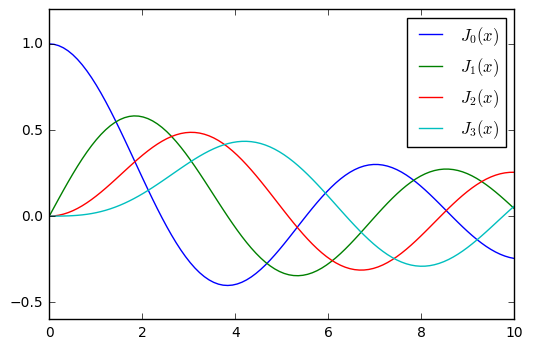

In [92]:
from scipy.special import jn
x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
plt.legend();

## Linear algebra in NumPy

Numpy ships with a basic linear algebra library, and all arrays have a `dot` method whose behavior is that of the scalar dot product when its arguments are vectors (one-dimensional arrays) and the traditional matrix multiplication when one or both of its arguments are two-dimensional arrays:

In [93]:
v1 = np.array([2, 3, 4])
v2 = np.array([1, 0, 1])

print(v1, '.', v2, '=', np.dot(v1, v2))

[2 3 4] . [1 0 1] = 6


Here is a regular matrix-vector multiplication, note that the array `v1` should be viewed as a *column* vector in traditional linear algebra notation; numpy makes no distinction between row and column vectors and simply verifies that the dimensions match the required rules of matrix multiplication, in this case we have a $2 \times 3$ matrix multiplied by a 3-vector, which produces a 2-vector:

In [94]:
A = np.arange(6).reshape(2, 3)
print(A, 'x', v1, '=', np.dot(A, v1))

[[0 1 2]
 [3 4 5]] x [2 3 4] = [11 38]


For matrix-matrix multiplication, the same dimension-matching rules must be satisfied, e.g. consider the difference between $A \times A^T$:

In [95]:
print(np.dot(A, A.T))

[[ 5 14]
 [14 50]]


and $A^T \times A$:

In [96]:
print(np.dot(A.T, A))

[[ 9 12 15]
 [12 17 22]
 [15 22 29]]


Furthermore, the `numpy.linalg` module includes additional functionality such as determinants, matrix norms, Cholesky, eigenvalue and singular value decompositions, etc.  For even more linear algebra tools, `scipy.linalg` contains the majority of the tools in the classic LAPACK libraries as well as functions to operate on sparse matrices.  We refer the reader to the Numpy and Scipy documentations for additional details on these.

## Reading and writing arrays to disk
Numpy lets you read and write arrays into files in a number of ways.  In order to use these tools well, it is critical to understand the difference between a *text* and a *binary* file containing numerical data.  In a text file, the number $\pi$ could be written as "3.141592653589793", for example: a string of digits that a human can read, with in this case 15 decimal digits.  In contrast, that same number written to a binary file would be encoded as 8 characters (bytes) that are not readable by a human but which contain the exact same data that the variable `pi` had in the computer's memory.  

The tradeoffs between the two modes are thus:

* Text mode: occupies more space, precision can be lost (if not all digits are written to disk), but is readable and editable by hand with a text editor.  Can *only* be used for one- and two-dimensional arrays.

* Binary mode: compact and exact representation of the data in memory, can't be read or edited by hand.  Arrays of any size and dimensionality can be saved and read without loss of information.

#### Text data

First, let's see how to read and write arrays in text mode.  The `np.savetxt` function saves an array to a text file, with options to control the precision, separators and even adding a header:

In [97]:
arr = np.arange(10).reshape(2, 5)
np.savetxt('test.out', arr, fmt='%.2e', header="My dataset")
!cat test.out

# My dataset
0.00e+00 1.00e+00 2.00e+00 3.00e+00 4.00e+00
5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00


And this same type of file can then be read with the matching `np.loadtxt` function:

In [98]:
arr2 = np.loadtxt('test.out')
print(arr2)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


#### Binary Data

For binary data, Numpy provides the `np.save` and `np.savez` routines.  The first saves a single array to a file with `.npy` extension, while the latter can be used to save a *group* of arrays into a single file with `.npz` extension.  The files created with these routines can then be read with the `np.load` function.

Let us first see how to use the simpler `np.save` function to save a single array:

In [99]:
np.save('test.npy', arr2)
# Now we read this back
arr2n = np.load('test.npy')
# Let's see if any element is non-zero in the difference.
# A value of True would be a problem.
print('Any differences?', np.any(arr2-arr2n))

Any differences? False


### .npz: multiple binary outputs in one file

Now let us see how the `np.savez` function works.  You give it a filename and either a sequence of arrays or a set of keywords.  In the first mode, the function will auotmatically name the saved arrays in the archive as `arr_0`, `arr_1`, etc:

In [100]:
np.savez('test.npz', arr, arr2)
arrays = np.load('test.npz')
arrays.files

['arr_1', 'arr_0']

Alternatively, we can explicitly choose how to name the arrays we save:

In [101]:
np.savez('test.npz', array1=arr, array2=arr2)
arrays = np.load('test.npz')
arrays.files

['array2', 'array1']

The object returned by `np.load` from an `.npz` file works like a dictionary, though you can also access its constituent files by attribute using its special `.f` field; this is best illustrated with an example with the `arrays` object from above:

In [102]:
print('First row of first array:', arrays['array1'][0])
# This is an equivalent way to get the same field
print('First row of first array:', arrays.f.array1[0])

First row of first array: [0 1 2 3 4]
First row of first array: [0 1 2 3 4]


This `.npz` format is a very convenient way to package compactly and without loss of information, into a single file, a group of related arrays that pertain to a specific problem.  At some point, however, the complexity of your dataset may be such that the optimal approach is to use one of the standard formats in scientific data processing that have been designed to handle complex datasets, such as NetCDF or HDF5.

** HDF5 files**

For manipulating files in the HDF5 format, there are two excellent options in Python: The PyTables project offers a high-level, object oriented approach to manipulating HDF5 datasets, including advanced querying capabilities, while the h5py project offers a more direct mapping to the standard HDF5 library interface.  Both are excellent tools; if you need to work with HDF5 datasets you should read some of their documentation and examples and decide which approach is a better match for your needs.

We will cover in deep the PyTables library during the last day of the training, but here you have a flavor of how to read a NumPy (structured) array out of it.  First, get the datasets inside the [HDF5 sample file](../data/ic_dst_NEXT_v0_08_02_Kr_ACTIVE_0_0_5bar_MCRD_10000.root.h5).

In [103]:
import tables
f = tables.open_file("../data/ic_dst_NEXT_v0_08_02_Kr_ACTIVE_0_0_5bar_MCRD_10000.root.h5", "r")
print(f)

../data/ic_dst_NEXT_v0_08_02_Kr_ACTIVE_0_0_5bar_MCRD_10000.root.h5 (File) ''
Last modif.: 'Wed Oct  5 19:09:39 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/acum (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/baseline (EArray(100, 12), shuffle, zlib(1)) ''
/BLR/mau (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(100, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtcwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/TWF (Table(1420,), shuffle, zlib(1)) 'Store for TWF'



Now, read the MCTracks and do a quick plot out of it:

In [111]:
f.root.MC.MCTracks

/MC/MCTracks (Table(806,), zlib(1)) ''
  description := {
  "event_indx": Int32Col(shape=(), dflt=0, pos=0),
  "mctrk_indx": Int32Col(shape=(), dflt=0, pos=1),
  "particle_name": StringCol(itemsize=10, shape=(), dflt=b'', pos=2),
  "pdg_code": Int32Col(shape=(), dflt=0, pos=3),
  "initial_vertex": Float32Col(shape=(3,), dflt=0.0, pos=4),
  "final_vertex": Float32Col(shape=(3,), dflt=0.0, pos=5),
  "momentum": Float32Col(shape=(3,), dflt=0.0, pos=6),
  "energy": Float32Col(shape=(), dflt=0.0, pos=7),
  "nof_hits": Int32Col(shape=(), dflt=0, pos=8),
  "hit_indx": Int32Col(shape=(), dflt=0, pos=9),
  "hit_position": Float32Col(shape=(3,), dflt=0.0, pos=10),
  "hit_time": Float32Col(shape=(), dflt=0.0, pos=11),
  "hit_energy": Float32Col(shape=(), dflt=0.0, pos=12)}
  byteorder := 'little'
  chunkshape := (1,)

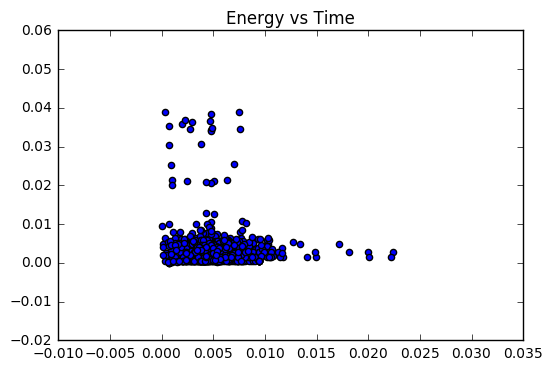

In [136]:
x = f.root.MC.MCTracks.cols.hit_energy[:]
y = f.root.MC.MCTracks.cols.hit_time[:]
plt.scatter(x, y)
plt.title("Energy vs Time")

**Relational Databases**

Python comes with a standard API (know as DBAPI) for accessing a variety of relational databases which is out of the scope of this course.

## Exercise

Provided an image:

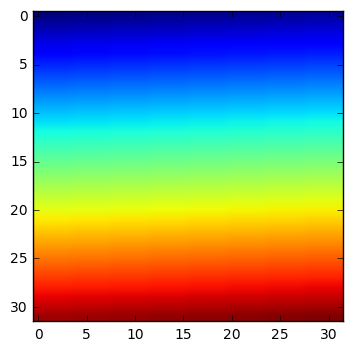

In [139]:
img = np.arange(2**10, dtype='float64').reshape(2**5, 2**5)
plt.imshow(img)

Create a function that downsamples the image so as to it does not loose their main characteristics.

*Hint:* Taking the average in a certain group of cells of squared shape (e.g. (2,2)) is a good way to keep image's main features.

**Bonus:** Do time measurements and try to optimize the computation as much as you can by using NumPy functionality.

*Caveat emptor*: Don't worry if you can't manage to get a decent performance.  Tomorrow we will tackle this with more heavier weaponery.

### Solution